# Avazu - Click-Through Rate Prediction

Julia Kang - jkang613@gmail.com - AMLI 2019 - Mills College

## Import Libraries

In [119]:
import pandas as pd
import numpy as np
import multiprocessing as mp
import psutil
import random
import datetime as datetime
import matplotlib.pyplot as plt


In [ ]:
## Load in Datta

In [41]:
#read in the original csv file

df = pd.read_csv('../data/train_sample.csv')

df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1000009418151094273,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,10000169349117863715,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,10000371904215119486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,10000640724480838376,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,10000679056417042096,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [3]:
# Check the number of cores and memory usage
num_cores = mp.cpu_count()
print("This kernel has ",num_cores,"cores and you can find the information regarding the memory usage:",psutil.virtual_memory())

This kernel has  2 cores and you can find the information regarding the memory usage: svmem(total=13660774400, available=12822257664, percent=6.1, used=564858880, free=12662702080, active=617058304, inactive=273485824, buffers=41693184, cached=391520256, shared=10665984, slab=47509504)


In [4]:
p = 0.01  # 1% of the lines
# keep the header, then take only 1% of lines
# if random from [0,1] interval is greater than 0.01 the row will be skipped
filename = '../data/train_ds.csv'

df_new = pd.read_csv(
         filename,
         header=0, 
         skiprows=lambda i: i>0 and random.random() > p
)

In [5]:
#view the shape of the randomly selected sample we generated
df_new.shape

(404410, 24)

In [6]:
df_new.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10004510652136496837,0,14102100,1005,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,...,1,0,20352,320,50,2333,0,39,-1,157
1,10007164336863914220,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,-1,79
2,10076859283156800622,0,14102100,1002,0,f17ebd97,c4e18dd6,50e219e0,ecad2386,7801e8d9,...,0,0,21692,216,36,2497,3,43,100151,42
3,10078825124049580646,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15705,320,50,1722,0,35,-1,79
4,10085233430943183912,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15701,320,50,1722,0,35,-1,79


In [10]:
#create new csv that is randomly sampled from originally training set that has 404,410 rows - it's been moved to the
#data folder

df_new.to_csv("rand_sample_csv.csv")

In [71]:
#read the csv file we created and make sure to pass the 'hour' column as the correct dtype

sub_df = pd.read_csv('data/rand_sample_csv.csv', parse_dates=['hour'])

In [72]:
sub_df.head() #preview the data

,Unnamed: 0,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0,10004510652136496837,0,14102100,1005,0,543a539e,c7ca3108,3e814130,ecad2386,...,1,0,20352,320,50,2333,0,39,-1,157
1,1,10007164336863914220,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,...,1,0,15706,320,50,1722,0,35,-1,79
2,2,10076859283156800622,0,14102100,1002,0,f17ebd97,c4e18dd6,50e219e0,ecad2386,...,0,0,21692,216,36,2497,3,43,100151,42
3,3,10078825124049580646,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,...,1,0,15705,320,50,1722,0,35,-1,79
4,4,10085233430943183912,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,...,1,0,15701,320,50,1722,0,35,-1,79


In [73]:
sub_df.columns #read through the column names so we can delete the first column since it is useless
sub_df = sub_df.drop('Unnamed: 0', axis = 1) 

Index(['Unnamed: 0', 'id', 'click', 'hour', 'C1', 'banner_pos', 'site_id',
       'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category',
       'device_id', 'device_ip', 'device_model', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21'],
      dtype='object')

In [75]:
sub_df.head() #check to make sure the column deletion was successful

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10004510652136496837,0,14102100,1005,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,...,1,0,20352,320,50,2333,0,39,-1,157
1,10007164336863914220,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,-1,79
2,10076859283156800622,0,14102100,1002,0,f17ebd97,c4e18dd6,50e219e0,ecad2386,7801e8d9,...,0,0,21692,216,36,2497,3,43,100151,42
3,10078825124049580646,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15705,320,50,1722,0,35,-1,79
4,10085233430943183912,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15701,320,50,1722,0,35,-1,79


In [78]:
# sub_df['date'], sub_df['time'] = sub_df['hour'].str[:6], sub_df['hour'][6:]


In [80]:
# feature engineering - work on the hour column and separate the hour and time into new columns
parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')
sub_df['new_hour'] = sub_df['hour'].apply(parse_date)
sub_df['new_hour']

In [87]:
sub_df['new_date'] = [d.date() for d in sub_df['new_hour']]
sub_df['new_time'] = [d.time() for d in sub_df['new_hour']]


In [88]:
sub_df.head() #check if column creation was successful

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C15,C16,C17,C18,C19,C20,C21,new_hour,new_date,new_time
0,10004510652136496837,0,14102100,1005,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,...,320,50,2333,0,39,-1,157,2014-10-21,2014-10-21,00:00:00
1,10007164336863914220,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,320,50,1722,0,35,-1,79,2014-10-21,2014-10-21,00:00:00
2,10076859283156800622,0,14102100,1002,0,f17ebd97,c4e18dd6,50e219e0,ecad2386,7801e8d9,...,216,36,2497,3,43,100151,42,2014-10-21,2014-10-21,00:00:00
3,10078825124049580646,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,320,50,1722,0,35,-1,79,2014-10-21,2014-10-21,00:00:00
4,10085233430943183912,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,320,50,1722,0,35,-1,79,2014-10-21,2014-10-21,00:00:00


In [89]:
sub_df = sub_df.drop('new_hour', axis = 1) #drop the 'new_hour' column do eliminate redundancy 

In [90]:
sub_df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C14,C15,C16,C17,C18,C19,C20,C21,new_date,new_time
0,10004510652136496837,0,14102100,1005,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,...,20352,320,50,2333,0,39,-1,157,2014-10-21,00:00:00
1,10007164336863914220,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15706,320,50,1722,0,35,-1,79,2014-10-21,00:00:00
2,10076859283156800622,0,14102100,1002,0,f17ebd97,c4e18dd6,50e219e0,ecad2386,7801e8d9,...,21692,216,36,2497,3,43,100151,42,2014-10-21,00:00:00
3,10078825124049580646,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15705,320,50,1722,0,35,-1,79,2014-10-21,00:00:00
4,10085233430943183912,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15701,320,50,1722,0,35,-1,79,2014-10-21,00:00:00


In [92]:
sub_df.to_csv("julia_rand_sample_hour.csv") #export as a csv so save for future use

In [94]:
sub_df = sub_df.drop('hour', axis = 1) 

In [95]:
sub_df.head()

,id,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,C14,C15,C16,C17,C18,C19,C20,C21,new_date,new_time
0,10004510652136496837,0,1005,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,07d7df22,...,20352,320,50,2333,0,39,-1,157,2014-10-21,00:00:00
1,10007164336863914220,1,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,15706,320,50,1722,0,35,-1,79,2014-10-21,00:00:00
2,10076859283156800622,0,1002,0,f17ebd97,c4e18dd6,50e219e0,ecad2386,7801e8d9,07d7df22,...,21692,216,36,2497,3,43,100151,42,2014-10-21,00:00:00
3,10078825124049580646,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,15705,320,50,1722,0,35,-1,79,2014-10-21,00:00:00
4,10085233430943183912,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,15701,320,50,1722,0,35,-1,79,2014-10-21,00:00:00


In [102]:
#check for null and empty values - There are none
sub_df.isnull().sum()

id                  0
click               0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
new_date            0
new_time            0
dtype: int64

## Clicks

In [104]:
#see what percentage of people click and what percentage of people do not click
# click = 16.9991% no click = 83.0009%
sub_df['click'].value_counts()/404410

0    0.830009
1    0.169991
Name: click, dtype: float64

In [115]:
clicks_per_hour = sub_df.groupby('new_time').agg({'click': 'sum'})

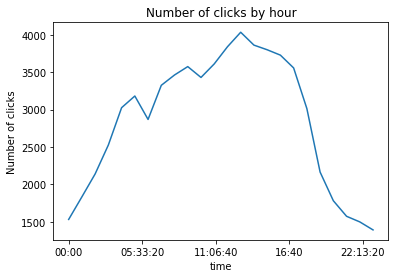

In [125]:
plt.plot(clicks_per_hour)
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour') 
plt.figsize=(12,6)

## Impressions

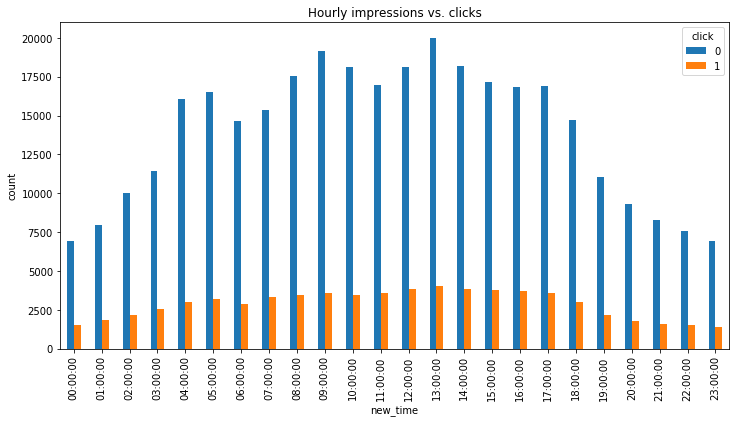

In [127]:
sub_df.groupby(['new_time', 'click']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(12,6))
plt.ylabel('count')
plt.title('Hourly impressions vs. clicks')

In [150]:
# ORDER MATTERS
click_per_view_per_hour = sub_df.groupby(['new_time','click']).size().unstack()
click_per_view_per_hour

click,0,1
new_time,,
00:00:00,6903,1532
01:00:00,7938,1834
02:00:00,10016,2140
03:00:00,11427,2527
04:00:00,16044,3025
05:00:00,16546,3181
06:00:00,14624,2868
07:00:00,15339,3324
08:00:00,17548,3462


Text(0.5, 1.0, 'Hourly Impressions vs. clicks')

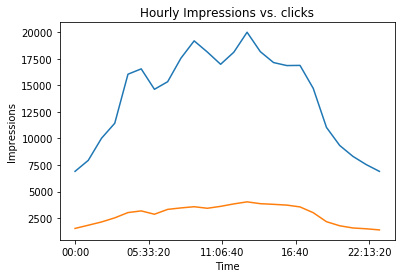

In [158]:
# plt.plot(click_per_view_per_hour, figsize = (12,6))
plt.plot(click_per_view_per_hour)
plt.ylabel('Impressions')
plt.xlabel('Time')
plt.title('Hourly Impressions vs. clicks')

practice git :)